# We examine the difference between decision trees, random forest, and gradient descent boosting

We start with an example on carseats data

In [1]:
library(tree)
library(ISLR)
attach(Carseats)

In [2]:
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

We build a tree from the dataframe made from Carseats data - and then give a summary of the tree then plot it

In [3]:
# Fitting Classification Trees
High=ifelse(Sales<=8,"No","Yes")
Carseats=data.frame(Carseats,High)
tree.carseats=tree(High~.-Sales,Carseats)
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

We see training error rate of 9%. Remember deviance is reported by:

-2 $\sum_m \sum_k n_{mk} \log \hat{p}_{mk}$

Where the residual mean deviance is simply $n - |T_0|$

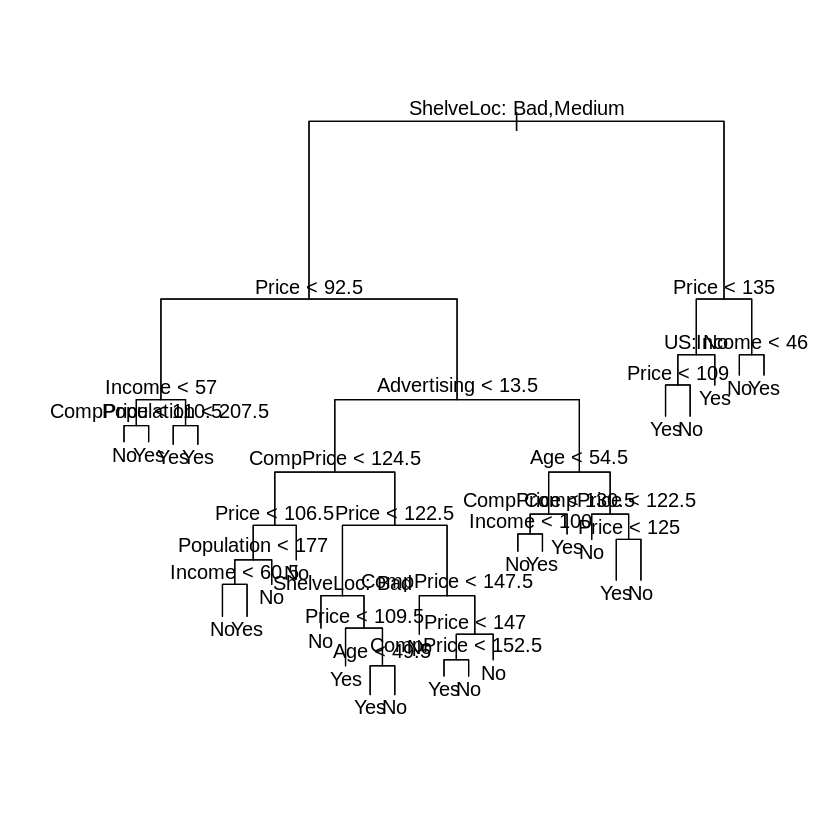

In [4]:
plot(tree.carseats)
text(tree.carseats,pretty=0)

The most important indicator seems to be shelving location. We can then see the rest of the splits

In [5]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

Now we want to train and test

In [6]:
set.seed(2)
train=sample(1:nrow(Carseats), 200)
Carseats.test=Carseats[-train,]
High.test=High[-train]
tree.carseats=tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(86+57)/200

         High.test
tree.pred No Yes
      No  86  27
      Yes 30  57

[1] 0.715

We probably need to prune the tree - let's see if that's any better

[1] "size"   "dev"    "k"      "method"

$size
[1] 19 17 14 13  9  7  3  2  1

$dev
[1] 55 55 53 52 50 56 69 65 80

$k
[1]       -Inf  0.0000000  0.6666667  1.0000000  1.7500000  2.0000000  4.2500000
[8]  5.0000000 23.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

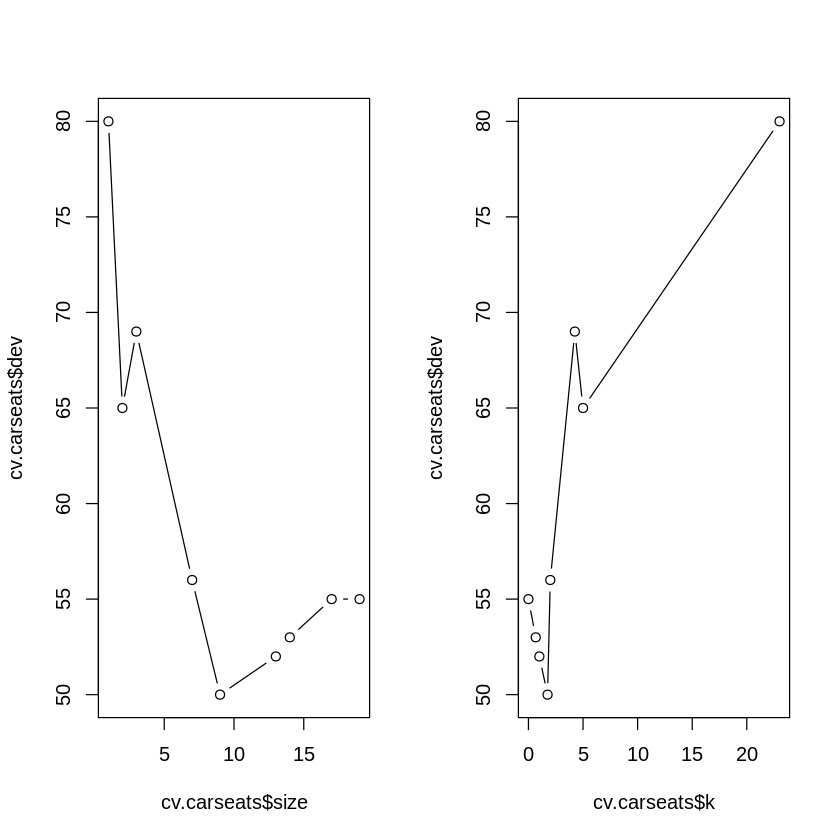

In [7]:
set.seed(3)
cv.carseats=cv.tree(tree.carseats,FUN=prune.misclass)
names(cv.carseats)
cv.carseats
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.carseats$k,cv.carseats$dev,type="b")

We want to look at the deviance on the tree and number of terminal nodes (with cross-validation error)

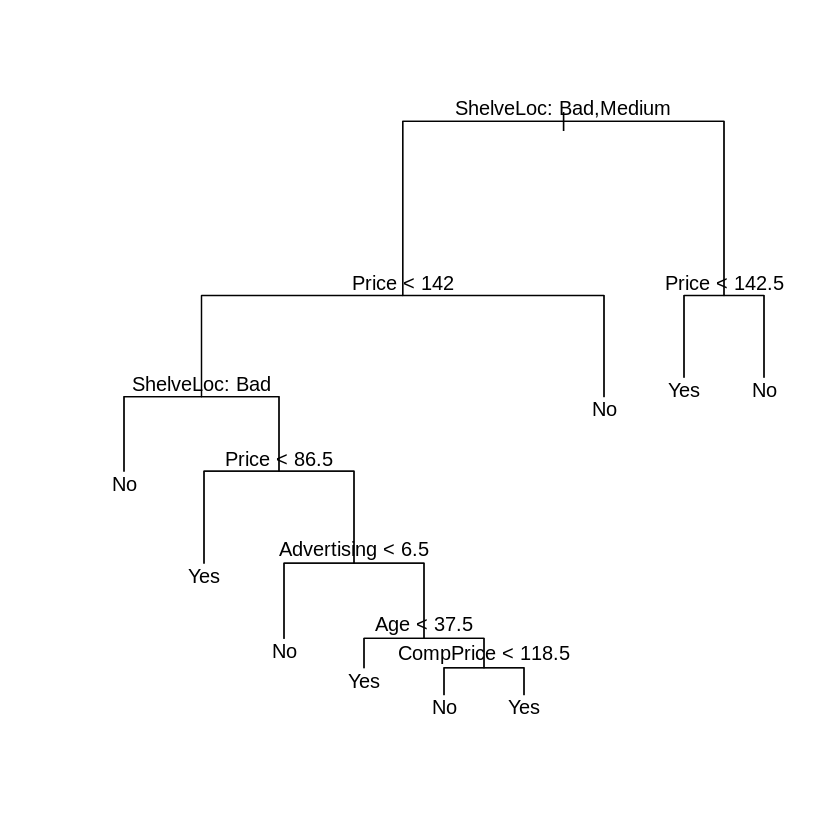

In [8]:
prune.carseats=prune.misclass(tree.carseats,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)

Now that we have pruned we want to compare the results

In [9]:
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(94+60)/200

         High.test
tree.pred No Yes
      No  94  24
      Yes 22  60

[1] 0.77

Be careful of how much you prune though!

         High.test
tree.pred No Yes
      No  86  22
      Yes 30  62

[1] 0.74

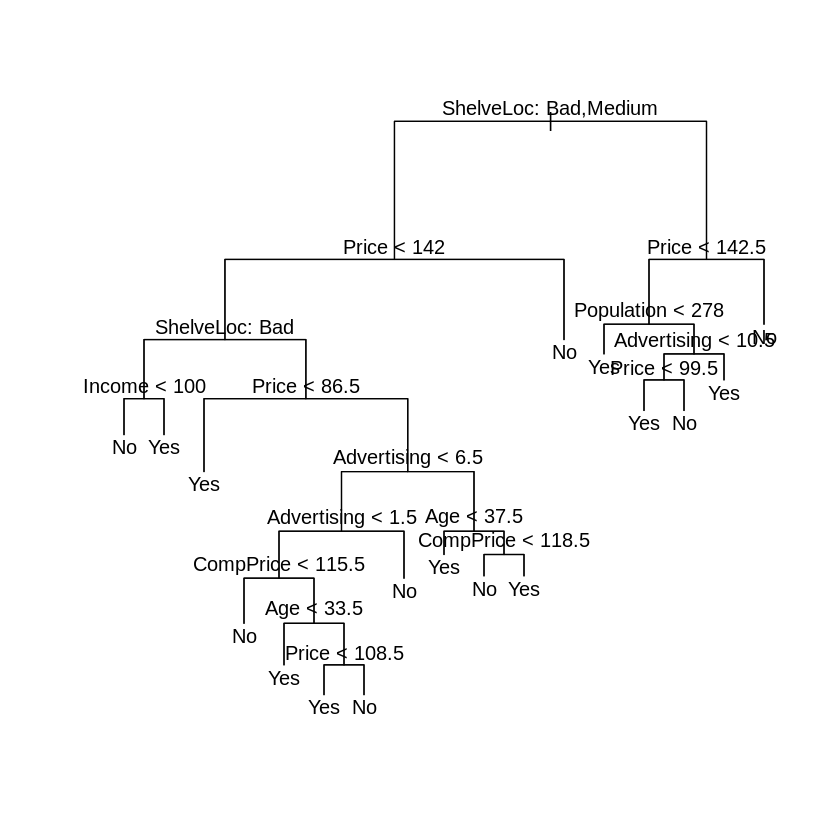

In [10]:
prune.carseats=prune.misclass(tree.carseats,best=15)
plot(prune.carseats)
text(prune.carseats,pretty=0)
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(86+62)/200

## Now we look at regression trees and the Boston dataset

In [11]:
library(MASS)
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

In [12]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

It seems only 3 variables were used, let's plot the tree

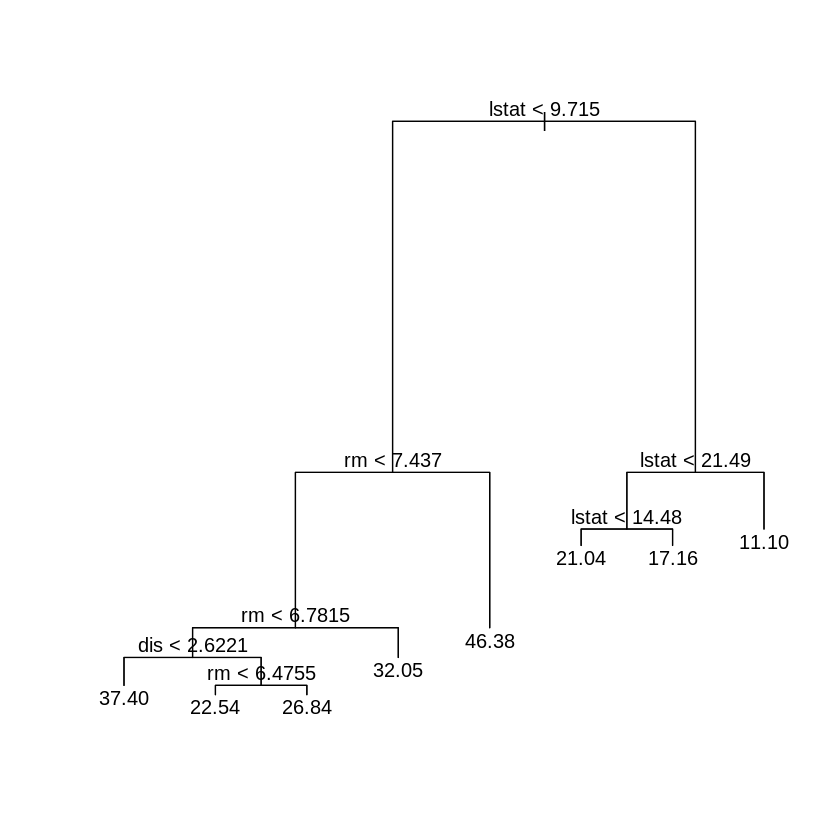

In [13]:
plot(tree.boston)
text(tree.boston,pretty=0)

Like the previous example let's see if post-pruning improves our tree much

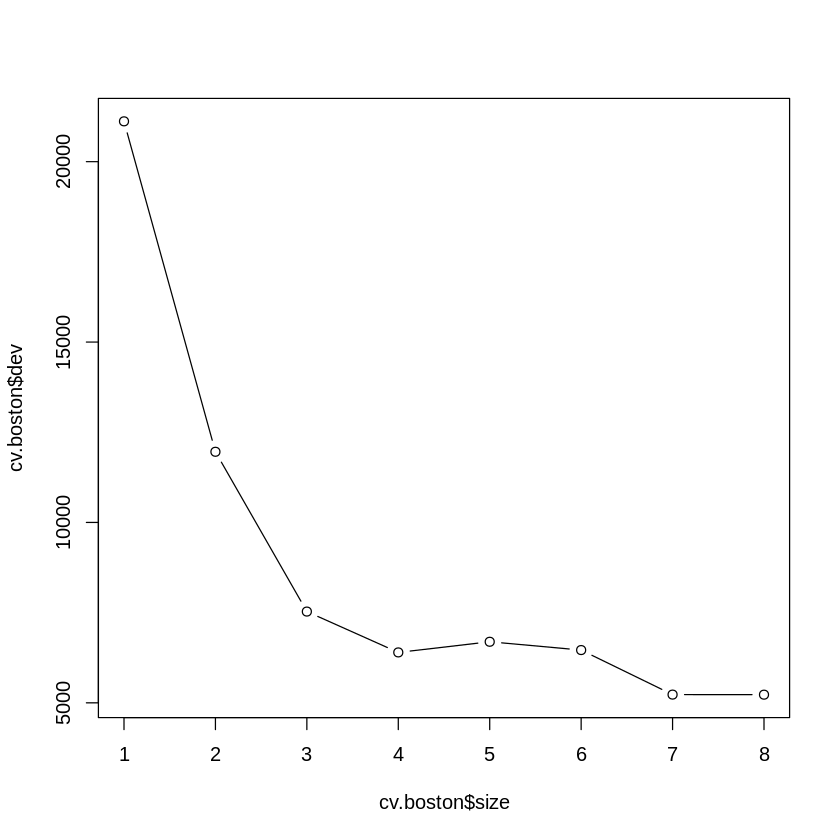

In [14]:
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type='b')

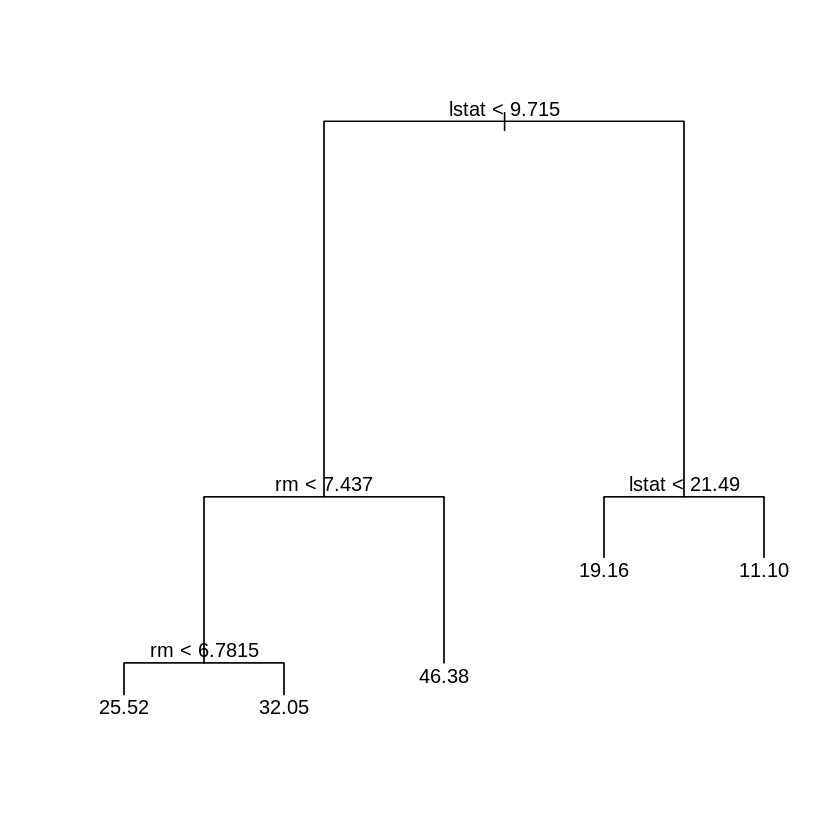

In [15]:
prune.boston=prune.tree(tree.boston,best=5)
plot(prune.boston)
text(prune.boston,pretty=0)

In matching CV results, we now predict on unpruned tree. 

[1] 25.04559

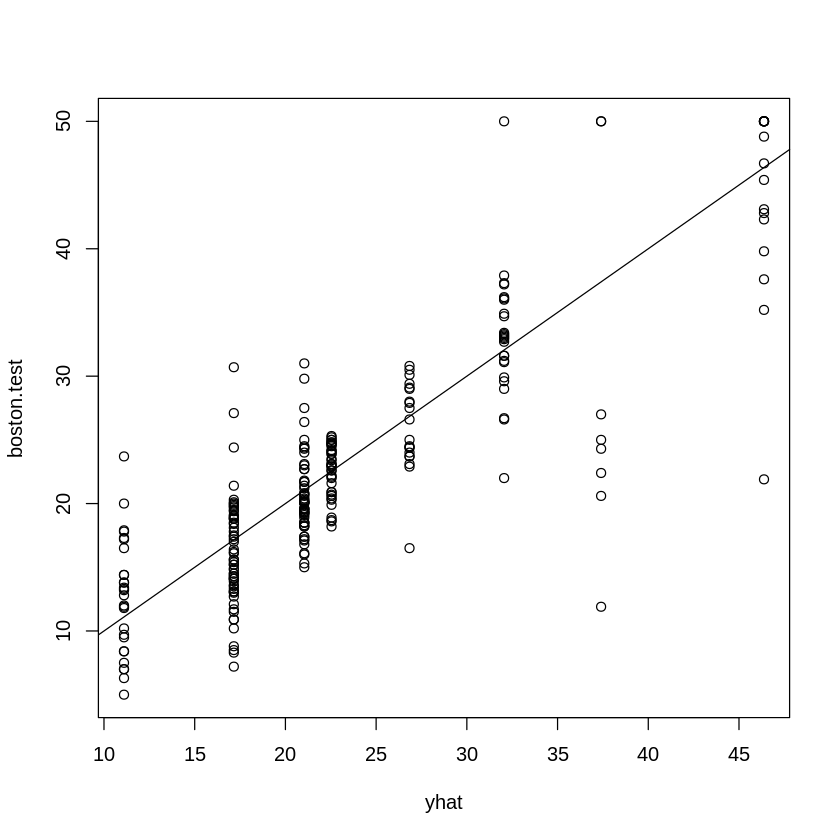

In [16]:
yhat=predict(tree.boston,newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
plot(yhat,boston.test)
abline(0,1)
mean((yhat-boston.test)^2)

What we see then is the test MSE is 25.50 - leaing to $5,005 of true median home value for the suburb

## Now we look into bagging and random forests

In [17]:
library(randomForest)
set.seed(1)
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,importance=TRUE)
bag.boston

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.15723
                    % Var explained: 86.49

mtry=13 indicates all 13 predicrtors should be considered, in other words, we should do bagging to make sure we account for variations

[1] 13.50808

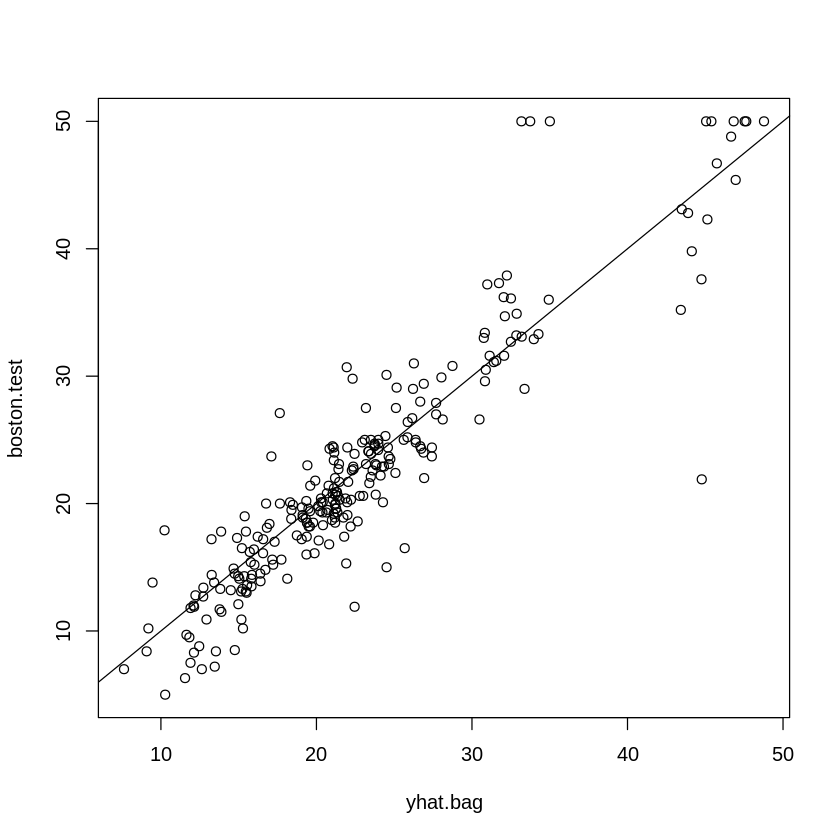

In [18]:
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0,1)
mean((yhat.bag-boston.test)^2)

Note that the test MSE is 13.16 - which is almost half of the best "optimal" single decision tree. - now we can play with the number of trees Random Forest uses

In [19]:
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,ntree=25)
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)

[1] 13.94835

This is very similar - we can limit the number of predictors it tries

In [20]:
set.seed(1)
rf.boston=randomForest(medv~.,data=Boston,subset=train,mtry=6,importance=TRUE)
yhat.rf = predict(rf.boston,newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)

[1] 11.66454

In this case, random forest does even better

it is natural, at this point, to consider the variable importance (and plot it) for random forest

,%IncMSE,IncNodePurity
crim,12.132320,986.50338
zn,1.955579,57.96945
indus,9.069302,882.78261
chas,2.210835,45.22941
nox,11.104823,1044.33776
rm,31.784033,6359.31971
age,10.962684,516.82969
dis,15.015236,1224.11605
rad,4.118011,95.94586
tax,8.587932,502.96719


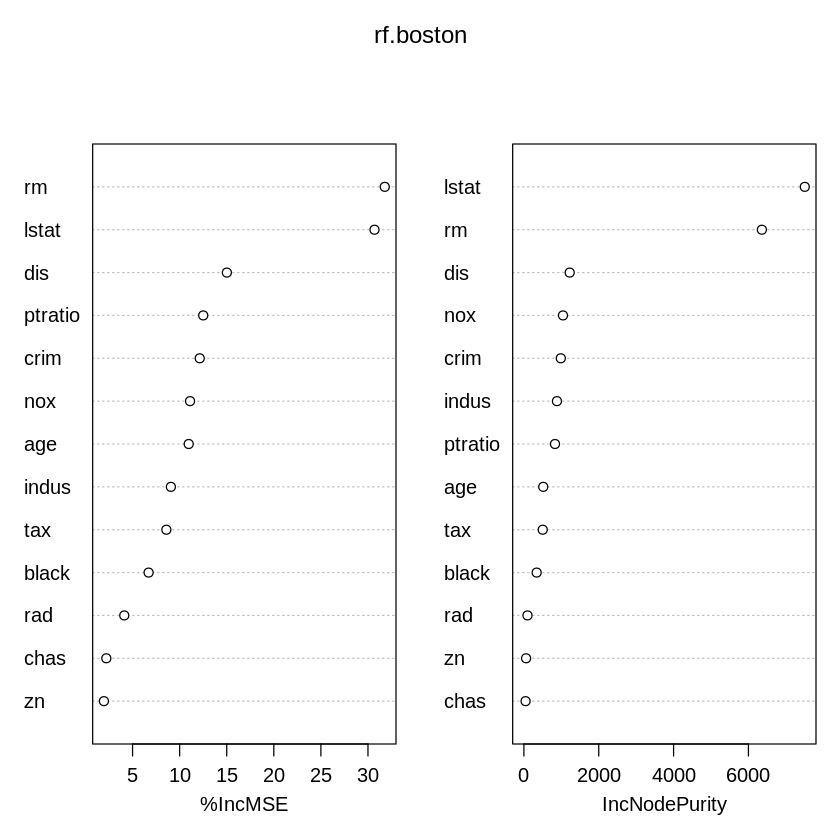

In [21]:

importance(rf.boston)
varImpPlot(rf.boston)

## Finally, we compare boosting to see how it performs, building trees sequentially

Loaded gbm 2.1.4


,var,rel.inf
lstat,lstat,37.0661275
rm,rm,25.3533123
dis,dis,11.7903016
crim,crim,8.0388750
black,black,4.2531659
nox,nox,3.5058570
age,age,3.4868724
ptratio,ptratio,2.2500385
indus,indus,1.7725070
tax,tax,1.1836592


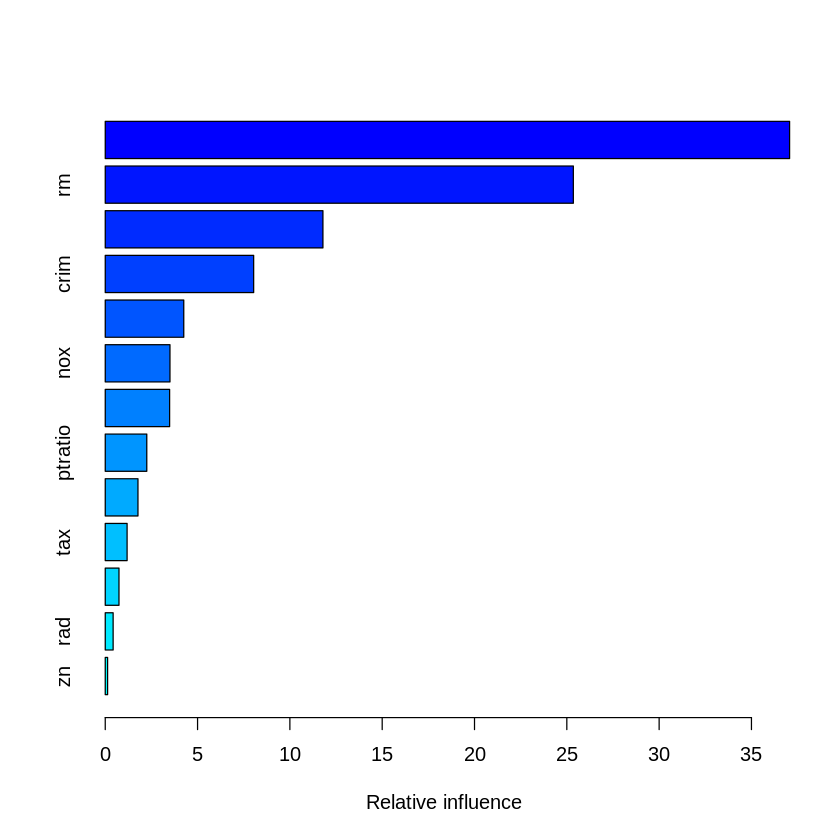

In [22]:
library(gbm)
set.seed(1)
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4)
summary(boost.boston)

Notice: 1) that took longer - two lstat and rm are the most improtant variables
2) these plots show partial dependence, these plots illustrate the marginal effect of the selected variable after integrating out the other variables. We can analyze the effect of the two variables

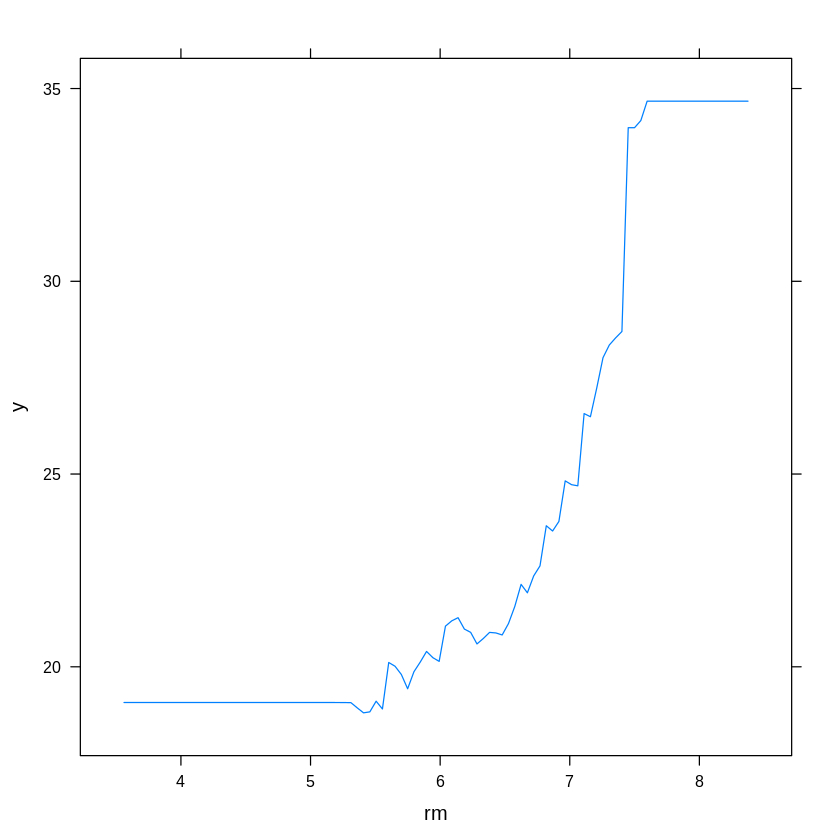

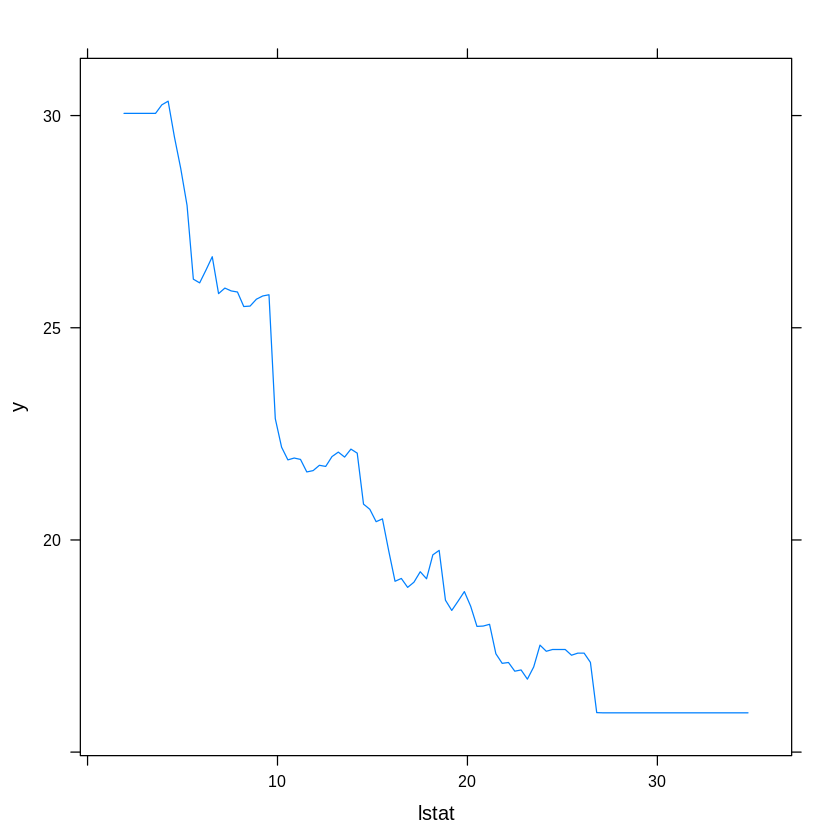

In [23]:
par(mfrow=c(1,2))
plot(boost.boston,i="rm")
plot(boost.boston,i="lstat")

We see prices increasing with rm and decreasing with lstat. Now we can run this on a test set.

In [24]:
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 10.81479

This yields even better test MSE. We can then play with the shrinkage parameter and see if we can do even better

In [25]:
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4,shrinkage=0.2,verbose=F)
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)


[1] 11.51109

And answer is no - so best to do some grid-searching to find the optimal $\lambda$